# **Лабораторная работа**
## KNN (Smoker-Status-Prediction)

Выполнил: Сороколетов Денис

Группа: 5030102/10401



## **1. Импорт библиотек и загрузка данных**

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


file_name = 'data.csv'
df = pd.read_csv(file_name)
df.head(10)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1.0,135.0,...,40,75.0,16.5,1.0,1.0,22.0,25.0,27.0,0.0,1.0
1,1,70,165,65,89.0,0.6,0.7,2,2.0,146.0,...,57,126.0,16.2,1.0,1.1,27.0,23.0,37.0,1.0,0.0
2,2,20,170,75,81.0,0.4,0.5,1,1.0,118.0,...,45,93.0,17.4,1.0,0.8,27.0,31.0,53.0,0.0,1.0
3,3,35,180,95,105.0,1.5,1.2,1,1.0,131.0,...,38,102.0,15.9,1.0,1.0,20.0,27.0,30.0,1.0,0.0
4,4,30,165,60,80.5,1.5,1.0,1,1.0,121.0,...,44,93.0,15.4,1.0,0.8,19.0,13.0,17.0,0.0,1.0
5,5,50,170,55,51.0,1.2,1.2,1,1.0,146.0,...,31,99.0,15.9,1.0,0.7,24.0,42.0,119.0,1.0,1.0
6,6,45,160,55,69.0,1.5,1.2,1,1.0,150.0,...,69,122.0,13.0,1.0,0.7,17.0,12.0,16.0,0.0,0.0
7,7,55,155,60,84.5,0.7,0.9,1,1.0,137.0,...,51,198.0,14.5,1.0,0.7,16.0,15.0,16.0,0.0,0.0
8,8,40,165,70,89.0,0.7,1.0,1,1.0,130.0,...,59,150.0,15.7,1.0,0.9,24.0,21.0,31.0,0.0,1.0
9,9,40,155,50,73.0,1.5,1.5,1,1.0,105.0,...,55,122.0,13.2,1.0,0.7,22.0,16.0,14.0,0.0,0.0


Общая информация о данных

In [122]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190359 entries, 0 to 190358
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   190359 non-null  int64  
 1   age                  190359 non-null  int64  
 2   height(cm)           190359 non-null  int64  
 3   weight(kg)           190359 non-null  int64  
 4   waist(cm)            190359 non-null  float64
 5   eyesight(left)       190359 non-null  float64
 6   eyesight(right)      190359 non-null  float64
 7   hearing(left)        190359 non-null  int64  
 8   hearing(right)       190359 non-null  float64
 9   systolic             190359 non-null  float64
 10  relaxation           190359 non-null  float64
 11  fasting blood sugar  190359 non-null  int64  
 12  Cholesterol          190359 non-null  int64  
 13  triglyceride         190359 non-null  int64  
 14  HDL                  190359 non-null  int64  
 15  LDL              

Количество пропущенных значений в данных

In [123]:
df.isnull().sum()

,0
id,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


## **2. Исследовательский анализ данных**

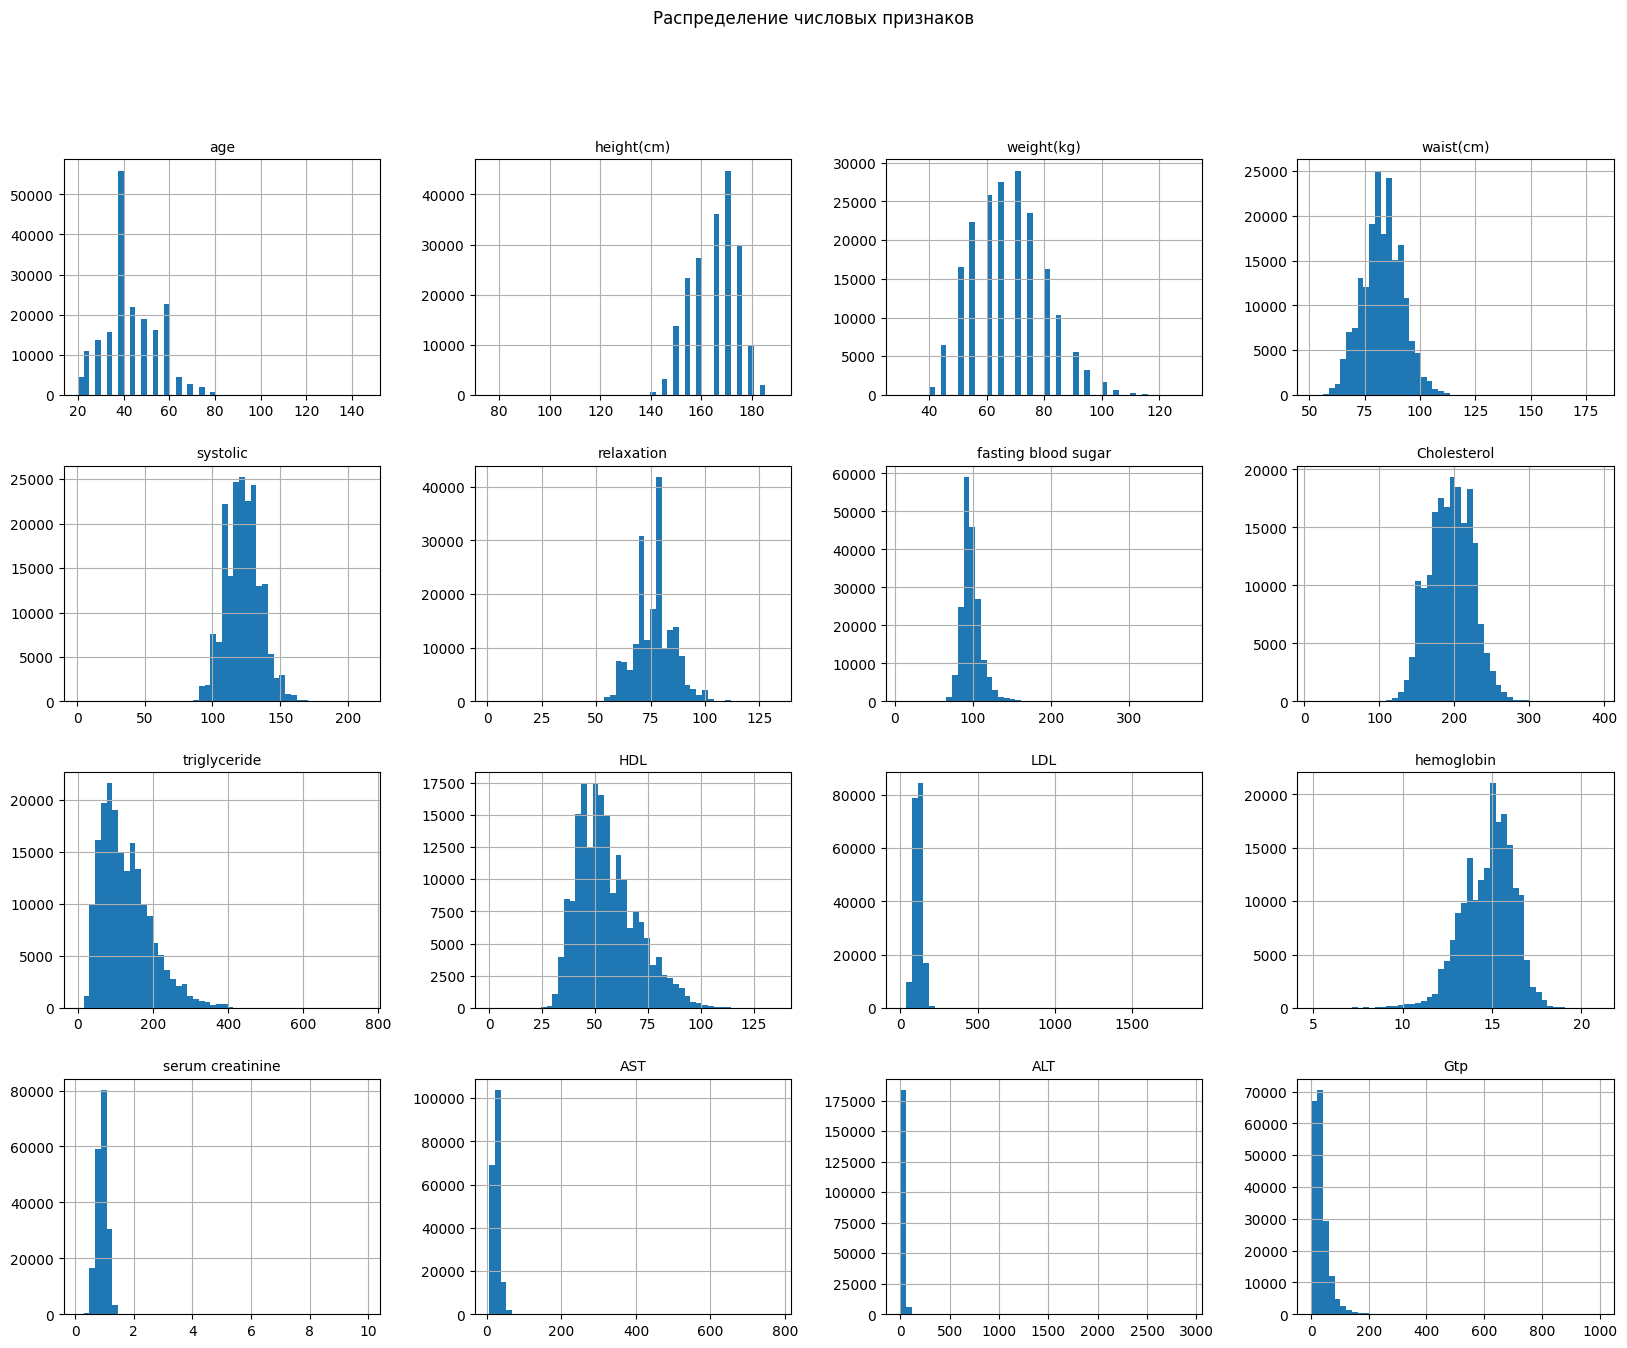

In [124]:
df_hist = df.drop(columns=['id', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'smoking'])

hist = df_hist.hist(bins = 50, figsize = (20,15))

for h in hist.flatten():
  h.set_title(h.get_title(), fontsize = 10)
plt.suptitle("Распределение числовых признаков")
plt.show()

In [125]:
df['smoking'].describe()

,smoking
count,190357.000000
mean,0.437709
std,0.496106
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


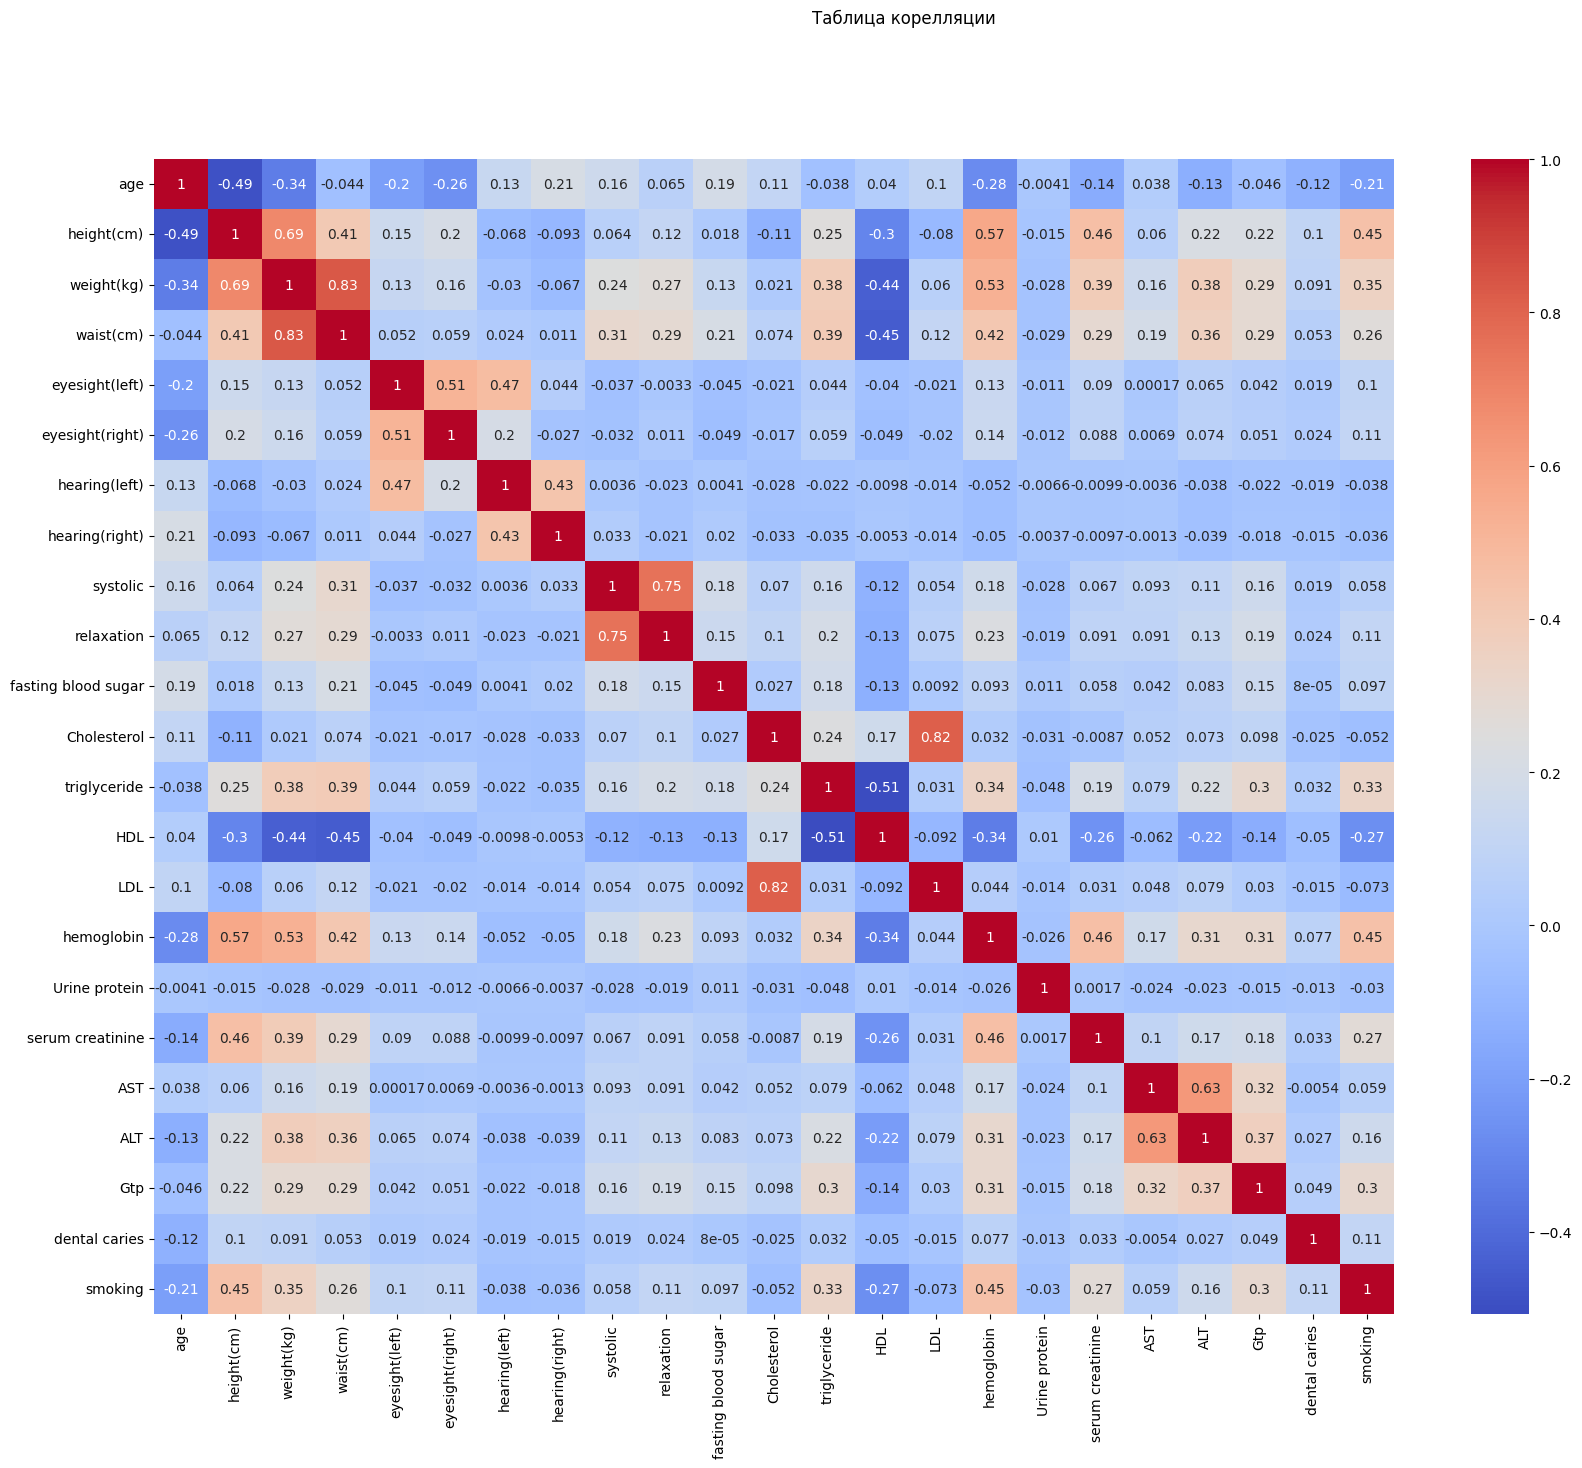

In [126]:
df_corr = df.drop(columns = ['id'])
plt.figure(figsize = (20, 15))
corr_mx = df_heat.corr()
sns.heatmap(corr_mx, annot = True, cmap = 'coolwarm')
plt.suptitle("Таблица корелляции")
plt.show()

## **3. Предаврительная обработка данных**

Добавление новых признаков

In [127]:
df['BMI'] = df['weight(kg)'] - pow(df['height(cm)'], 2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190359 entries, 0 to 190358
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   190359 non-null  int64  
 1   age                  190359 non-null  int64  
 2   height(cm)           190359 non-null  int64  
 3   weight(kg)           190359 non-null  int64  
 4   waist(cm)            190359 non-null  float64
 5   eyesight(left)       190359 non-null  float64
 6   eyesight(right)      190359 non-null  float64
 7   hearing(left)        190359 non-null  int64  
 8   hearing(right)       190359 non-null  float64
 9   systolic             190359 non-null  float64
 10  relaxation           190359 non-null  float64
 11  fasting blood sugar  190359 non-null  int64  
 12  Cholesterol          190359 non-null  int64  
 13  triglyceride         190359 non-null  int64  
 14  HDL                  190359 non-null  int64  
 15  LDL              

Удаление выбросов

*triglyceride:*

In [128]:
Q1_tri = df['triglyceride'].quantile(0.25)
Q3_tri= df['triglyceride'].quantile(0.75)
IQR_tri = Q3_tri - Q1_tri
lim_max_tri = Q3_tri + 1.5 * IQR_tri
lim_min_tri = Q1_tri - 1.5 * IQR_tri
df = df[(df['triglyceride'] >= lim_min_tri) & (df['triglyceride'] <= lim_max_tri)]

*HDL:*

In [129]:
Q1_HDL = df['HDL'].quantile(0.25)
Q3_HDL= df['HDL'].quantile(0.75)
IQR_HDL = Q3_HDL - Q1_HDL
lim_max_HDL = Q3_HDL + 1.5 * IQR_HDL
lim_min_HDL = Q1_HDL - 1.5 * IQR_HDL
df = df[(df['HDL'] >= lim_min_HDL) & (df['HDL'] <= lim_max_HDL)]

*hemoglobin:*

In [130]:
Q1_hem = df['hemoglobin'].quantile(0.25)
Q3_hem= df['hemoglobin'].quantile(0.75)
IQR_hem = Q3_hem - Q1_hem
lim_max_hem = Q3_hem + 1.5 * IQR_hem
lim_min_hem = Q1_hem - 1.5 * IQR_hem
df = df[(df['hemoglobin'] >= lim_min_hem) & (df['hemoglobin'] <= lim_max_hem)]

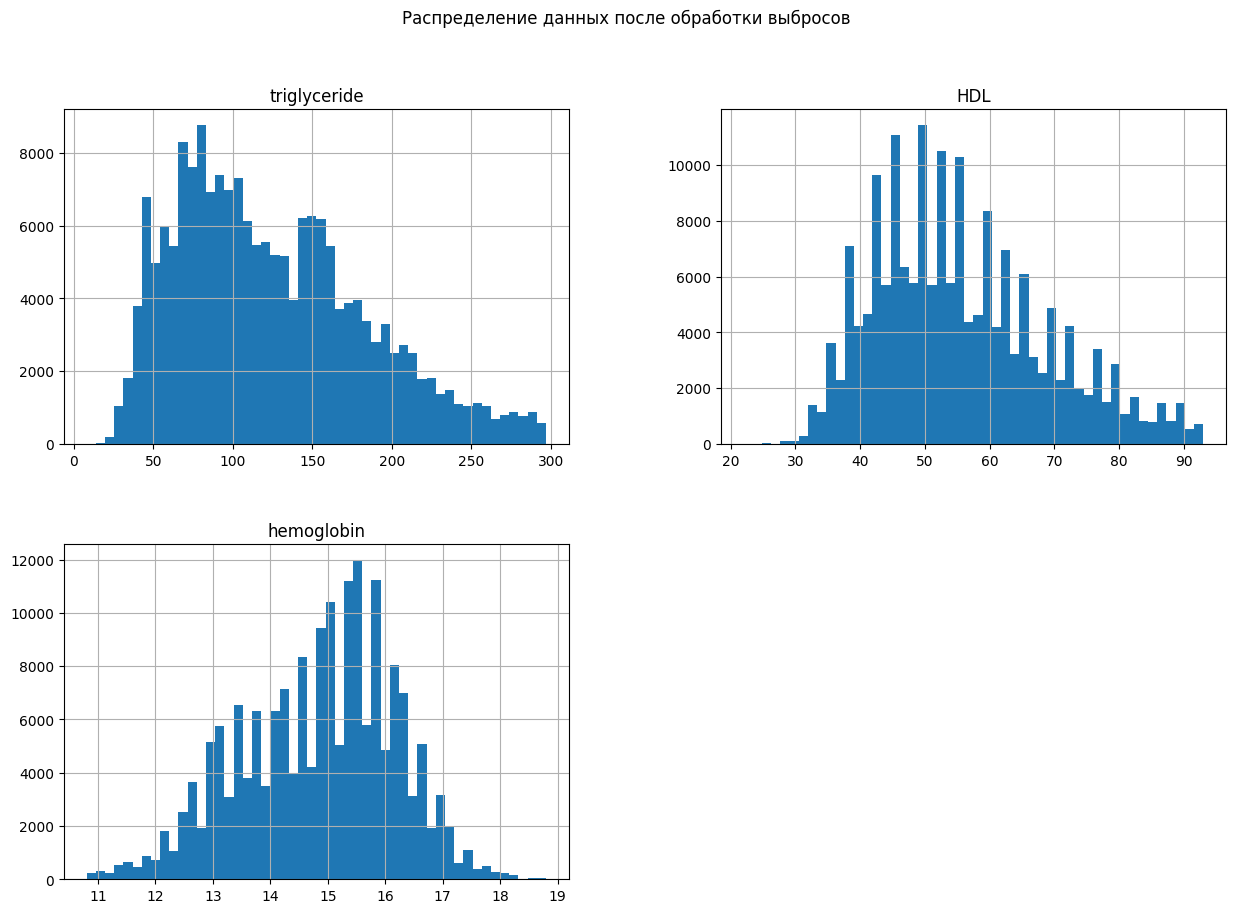

In [131]:
df_outlier = df[['triglyceride', 'HDL', 'hemoglobin']]
df_outlier.hist(figsize = (15, 10), bins = 50)
plt.suptitle("Распределение данных после обработки выбросов")
plt.show()

Удаление пропущенных значений

In [132]:
df.dropna()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI
1,1,70,165,65,89.0,0.6,0.7,2,2.0,146.0,...,126.0,16.2,1.0,1.1,27.0,23.0,37.0,1.0,0.0,-27160
2,2,20,170,75,81.0,0.4,0.5,1,1.0,118.0,...,93.0,17.4,1.0,0.8,27.0,31.0,53.0,0.0,1.0,-28825
3,3,35,180,95,105.0,1.5,1.2,1,1.0,131.0,...,102.0,15.9,1.0,1.0,20.0,27.0,30.0,1.0,0.0,-32305
4,4,30,165,60,80.5,1.5,1.0,1,1.0,121.0,...,93.0,15.4,1.0,0.8,19.0,13.0,17.0,0.0,1.0,-27165
6,6,45,160,55,69.0,1.5,1.2,1,1.0,150.0,...,122.0,13.0,1.0,0.7,17.0,12.0,16.0,0.0,0.0,-25545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190354,159251,40,155,45,69.0,1.5,2.0,1,1.0,127.0,...,159.0,14.5,1.0,0.8,25.0,26.0,13.0,0.0,0.0,-23980
190355,159252,50,155,75,82.0,1.0,1.0,1,1.0,120.0,...,108.0,14.5,1.0,0.6,21.0,20.0,18.0,0.0,0.0,-23950
190356,159253,40,160,50,66.0,1.5,1.0,1,1.0,114.0,...,93.0,10.9,1.0,0.6,15.0,9.0,12.0,0.0,0.0,-25550
190357,159254,50,165,75,92.0,1.2,1.0,1,1.0,121.0,...,80.0,14.4,1.0,1.1,22.0,17.0,37.0,0.0,1.0,-27150


Разделение на обучающие и тестовые данные

In [133]:
X = df.drop(columns = ['id', 'smoking'])
Y = df['smoking']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Масштабирование данных

In [134]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## **4. Подбор оптимального количества соседей**

In [142]:
KNN = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 11)}
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, Y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f'Оптимальное количество соседей: {best_n_neighbors}')

Оптимальное количество соседей: 9


## **5. Построение итоговой модели и ее оценка**

In [143]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.7422643778701071
Precision: 0.6912264261450158
Recall: 0.7395200200513816
